<a href="https://colab.research.google.com/github/karloxkronfeld/covid19/blob/master/mapaCovidColombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files

In [3]:
archivo=files.upload()

Saving cordenadas.csv to cordenadas.csv


In [5]:
cord_colombia=pd.read_csv("cordenadas.csv")
cord_colombia=cord_colombia.iloc[:,[0,7,6]].reset_index(drop=True)
cord_colombia.columns=["codigo","lat","lon"]
cord_colombia=cord_colombia.groupby("codigo").mean().reset_index()

In [7]:
latitudes={cord_colombia.codigo[i]:cord_colombia.lat[i] for i in range(len(cord_colombia))}
longitudes={cord_colombia.codigo[i]:cord_colombia.lon[i] for i in range(len(cord_colombia))}

In [40]:
covid_colombia=pd.read_csv("https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD")
covid_colombia=covid_colombia.drop(36028,0).reset_index(drop=True)

In [41]:
covid_colombia["latitud"]=covid_colombia['Código DIVIPOLA'].map(latitudes)
covid_colombia["longitud"]=covid_colombia['Código DIVIPOLA'].map(longitudes)

In [43]:
covid_deptos=covid_colombia.iloc[:,[4,15,-1,-2]]
covid_deptos.columns=["depto","fecha","lon","lat"]

In [46]:
casos_depto=covid_deptos.groupby("depto")["fecha"].count().reset_index(name="casos")
casos_depto["lon"]=covid_deptos.groupby("depto")["lon"].mean().values
casos_depto["lat"]=covid_deptos.groupby("depto")["lat"].mean().values
casos_depto=casos_depto.sort_values("casos")

In [ ]:
!pip install geopandas

In [49]:
import geopandas as gpd
from pylab import *

In [50]:
geocol="https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/3aadedf47badbdac823b00dbe259f6bc6d9e1899/colombia.geo.json"
geocol=gpd.read_file(geocol)

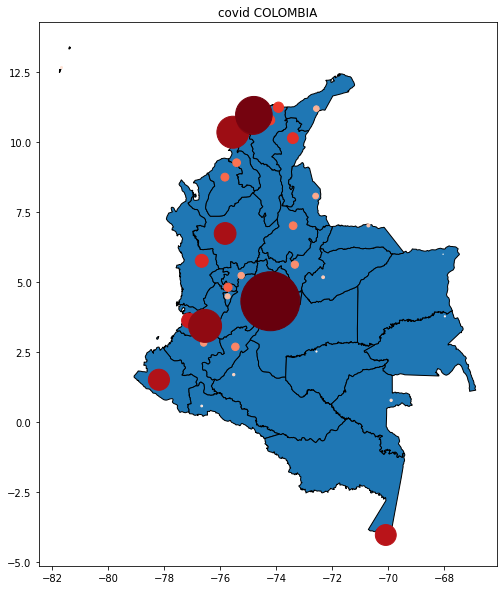

In [53]:
geocol.plot(figsize=(10,10),edgecolor="k")
scatter(casos_depto.lon,casos_depto.lat,s=casos_depto.casos*0.2,cmap="Reds",c=np.linspace(0,1,37))
title("covid COLOMBIA")
# axis("off")
show()